In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
xls_data = pd.read_csv('C:/Users/Sanu/Desktop/DataSet/shopping_mall.csv',encoding= 'unicode_escape')
xls_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom


In [4]:
xls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [5]:
xls_data.describe()

,Quantity,UnitPrice,CustomerID
count,75120.000000,75120.00000,48212.000000
mean,9.043384,5.25234,15257.869327
std,387.339709,116.75314,1765.475916
min,-74215.000000,0.00000,12346.000000
25%,1.000000,1.25000,13767.000000
50%,3.000000,2.46000,15078.000000
75%,9.000000,4.24000,16916.000000
max,74215.000000,16888.02000,18283.000000


In [5]:
#uni_cust= xls_data['CustomerID'].unique()
#len(uni_cust)

1429

In [ ]:
#sns.boxplot(y= 'CustomerID',x='UnitPrice', data=xls_data)
#plt.show()

In [6]:
#find null value

xls_data.isnull().sum()


InvoiceNo          0
StockCode          0
Description      205
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     26908
Country            0
dtype: int64

In [7]:
# dropping the missing values
df1= xls_data.dropna(axis=0)

In [8]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom
...,...,...,...,...,...,...,...,...
75115,556023,22425,ENAMEL COLANDER CREAM,1,6/8/2011 12:21,4.95,14527.0,United Kingdom
75116,556023,23182,TOILET SIGN OCCUPIED OR VACANT,4,6/8/2011 12:21,0.83,14527.0,United Kingdom
75117,556023,82580,BATHROOM METAL SIGN,4,6/8/2011 12:21,0.55,14527.0,United Kingdom
75118,556023,22672,FRENCH BATHROOM SIGN BLUE METAL,4,6/8/2011 12:21,1.65,14527.0,United Kingdom


In [10]:
df1= df1.drop(["StockCode","Description","Country"],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    48212 non-null  object 
 1   Quantity     48212 non-null  int64  
 2   InvoiceDate  48212 non-null  object 
 3   UnitPrice    48212 non-null  float64
 4   CustomerID   48212 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ MB


In [11]:
# we are considering return as no business profit no loss
def handle_negative_values(num):
    if num<0:
        return 0
    else:
        return num


In [12]:
df1.Quantity = [handle_negative_values(x) for x in df1.Quantity]


In [13]:
df1.Quantity.min()
df1["Total"]= df1["Quantity"]*df1["UnitPrice"]
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536627,1,12/2/2010 10:53,19.95,15658.0,19.95
1,536627,2,12/2/2010 10:53,8.50,15658.0,17.00
2,536627,3,12/2/2010 10:53,5.95,15658.0,17.85
3,536627,12,12/2/2010 10:53,1.45,15658.0,17.40
4,536627,4,12/2/2010 10:53,12.75,15658.0,51.00


In [14]:
#dropping the quantity and unit price
df1=df1.drop(["Quantity","UnitPrice"], axis=1)


In [15]:
df1

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,12/2/2010 10:53,15658.0,19.95
1,536627,12/2/2010 10:53,15658.0,17.00
2,536627,12/2/2010 10:53,15658.0,17.85
3,536627,12/2/2010 10:53,15658.0,17.40
4,536627,12/2/2010 10:53,15658.0,51.00
...,...,...,...,...
75115,556023,6/8/2011 12:21,14527.0,4.95
75116,556023,6/8/2011 12:21,14527.0,3.32
75117,556023,6/8/2011 12:21,14527.0,2.20
75118,556023,6/8/2011 12:21,14527.0,6.60


In [16]:
df1.InvoiceDate = pd.to_datetime(df1.InvoiceDate)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    48212 non-null  object        
 1   InvoiceDate  48212 non-null  datetime64[ns]
 2   CustomerID   48212 non-null  float64       
 3   Total        48212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.8+ MB


In [17]:
df2=df1.drop(["InvoiceDate","CustomerID"],axis=1)


In [18]:
df2

,InvoiceNo,Total
0,536627,19.95
1,536627,17.00
2,536627,17.85
3,536627,17.40
4,536627,51.00
...,...,...
75115,556023,4.95
75116,556023,3.32
75117,556023,2.20
75118,556023,6.60


In [19]:
#calculating the total with respect to unique invoice no.
df2=df2.groupby(["InvoiceNo"]).sum()

In [21]:
# df2.head()
# df2.tail()

df2_final = df2.reset_index()
df2_final

,InvoiceNo,Total
0,536627,217.80
1,536628,230.56
2,536629,22.20
3,536630,244.46
4,536631,22.20
...,...,...
2935,C555889,0.00
2936,C555892,0.00
2937,C555908,0.00
2938,C555935,0.00


In [22]:
df1 =df1.drop(["Total"],axis=1)


In [23]:
df1.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
1,536627,2010-12-02 10:53:00,15658.0
2,536627,2010-12-02 10:53:00,15658.0
3,536627,2010-12-02 10:53:00,15658.0
4,536627,2010-12-02 10:53:00,15658.0


In [24]:
#droping the duplicate values
df1_final = df1.drop_duplicates(subset="InvoiceNo")
df1_final.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
8,536628,2010-12-02 10:54:00,17850.0
24,536629,2010-12-02 10:55:00,17850.0
26,536630,2010-12-02 10:56:00,17850.0
42,536631,2010-12-02 10:58:00,17850.0


In [25]:
df_final = pd.merge(df1_final,df2_final,how="left",on="InvoiceNo")


In [26]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,217.80
1,536628,2010-12-02 10:54:00,17850.0,230.56
2,536629,2010-12-02 10:55:00,17850.0,22.20
3,536630,2010-12-02 10:56:00,17850.0,244.46
4,536631,2010-12-02 10:58:00,17850.0,22.20
...,...,...,...,...
2935,556019,2011-06-08 12:02:00,18092.0,221.40
2936,556020,2011-06-08 12:03:00,13571.0,114.71
2937,556021,2011-06-08 12:03:00,12921.0,477.68
2938,556022,2011-06-08 12:04:00,12921.0,79.20


In [28]:
max(df_final.InvoiceDate)
min(df_final.InvoiceDate)

Timestamp('2011-06-08 12:21:00')

In [30]:
import datetime as dt
latest_date = dt.datetime(2011,6,10)
latest_date

datetime.datetime(2011, 6, 10, 0, 0)

In [31]:
RFM_Score = df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,"InvoiceNo":lambda x:x.count(),"Total":lambda x:x.sum()})

In [32]:
RFM_Score.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,142,2,77183.60
12347.0,134,1,475.39
12348.0,135,2,1120.24
12350.0,127,1,334.40
12352.0,100,5,1281.15


In [33]:
RFM_Score = RFM_Score.reset_index()
RFM_Score

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [55]:
#RFM_Score.head()
RFM_Score.describe()

,CustomerID,InvoiceDate,InvoiceNo,Total
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,15240.514006,116.467087,2.058824,829.521583
std,1755.954201,47.947906,2.259459,3219.424761
min,12346.000000,1.000000,1.000000,0.000000
25%,13748.500000,112.000000,1.000000,181.337500
50%,15172.500000,126.000000,1.000000,340.605000
75%,16781.250000,142.000000,2.000000,717.030000
max,18283.000000,189.000000,31.000000,77183.600000


In [34]:

#rename the columns
RFM_Score = RFM_Score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})
RFM_Score

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [36]:
quantiles = RFM_Score.quantile(q=[0.25,0.5,0.75])


In [37]:
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,13748.50,112.0,1.0,181.3375
0.50,15172.50,126.0,1.0,340.6050
0.75,16781.25,142.0,2.0,717.0300


In [38]:
def Customer_Recency_Scoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<-d[p][0.5]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [41]:
def Customer_Frequency_Scoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<-d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

In [42]:
def Customer_Monetary_Scoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<-d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

In [62]:
RFM_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1428 non-null   float64
 1   Recency     1428 non-null   int64  
 2   Frequency   1428 non-null   int64  
 3   Monetary    1428 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 44.8 KB


In [43]:
#adding the new labels to assign scores for recency, frequency, monetary

RFM_Score["R"] = RFM_Score["Recency"].apply(Customer_Recency_Scoring,args=("Recency",quantiles))
RFM_Score["F"] = RFM_Score["Frequency"].apply(Customer_Frequency_Scoring,args=("Frequency",quantiles))
RFM_Score["M"] = RFM_Score["Monetary"].apply(Customer_Monetary_Scoring,args=("Monetary",quantiles))

In [44]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,142,2,77183.60,2,3,4
1,12347.0,134,1,475.39,2,1,3
2,12348.0,135,2,1120.24,2,3,4
3,12350.0,127,1,334.40,2,1,3
4,12352.0,100,5,1281.15,4,4,4


In [45]:
RFM_Score["RFM_ID"]=RFM_Score.R.map(str)+RFM_Score.F.map(str)+RFM_Score.M.map(str)

In [46]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID
0,12346.0,142,2,77183.60,2,3,4,234
1,12347.0,134,1,475.39,2,1,3,213
2,12348.0,135,2,1120.24,2,3,4,234
3,12350.0,127,1,334.40,2,1,3,213
4,12352.0,100,5,1281.15,4,4,4,444
...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,2,1,3,213
1424,18260.0,139,3,787.77,2,4,4,244
1425,18269.0,175,1,0.00,1,1,1,111
1426,18277.0,135,1,0.00,2,1,1,211


In [47]:
RFM_Score["RFM_Sum"]=RFM_Score[["R","F","M"]].sum(axis=1)

In [48]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum
0,12346.0,142,2,77183.60,2,3,4,234,9
1,12347.0,134,1,475.39,2,1,3,213,6
2,12348.0,135,2,1120.24,2,3,4,234,9
3,12350.0,127,1,334.40,2,1,3,213,6
4,12352.0,100,5,1281.15,4,4,4,444,12
...,...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,2,1,3,213,6
1424,18260.0,139,3,787.77,2,4,4,244,10
1425,18269.0,175,1,0.00,1,1,1,111,3
1426,18277.0,135,1,0.00,2,1,1,211,4


In [49]:
Loyality_level = ["Silver","Gold","Diamond","Platinum"]

In [50]:
score_cuts = pd.qcut(RFM_Score.RFM_Sum,q=4,labels=Loyality_level)

In [52]:
score_cuts.values


C:\Users\Sanu\AppData\Local\Temp\ipykernel_4460\284731194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_Score["RFM_Sum"]["RFM_Loyality"]=score_cuts.values


In [53]:
RFM_Score["RFM_Loyality"]=score_cuts.values

In [54]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_Loyality
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond
1,12347.0,134,1,475.39,2,1,3,213,6,Gold
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond
3,12350.0,127,1,334.40,2,1,3,213,6,Gold
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum
...,...,...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,2,1,3,213,6,Gold
1424,18260.0,139,3,787.77,2,4,4,244,10,Platinum
1425,18269.0,175,1,0.00,1,1,1,111,3,Silver
1426,18277.0,135,1,0.00,2,1,1,211,4,Silver


In [55]:
Newdata=RFM_Score[["RFM_Sum"]]
Newdata

,RFM_Sum
0,9
1,6
2,9
3,6
4,12
...,...
1423,6
1424,10
1425,3
1426,4


In [57]:
from sklearn.cluster import KMeans
SSE = []
for K in range(1,30):
    Kmeans=KMeans(n_clusters=K,init="k-means++")
    Kmeans.fit(Newdata)
    SSE.append(Kmeans.inertia_)

C:\Users\Sanu\AppData\Local\Temp\ipykernel_4460\1235771412.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  Kmeans.fit(Newdata)
C:\Users\Sanu\AppData\Local\Temp\ipykernel_4460\1235771412.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  Kmeans.fit(Newdata)
C:\Users\Sanu\AppData\Local\Temp\ipykernel_4460\1235771412.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  Kmeans.fit(Newdata)
C:\Users\Sanu\AppData\Local\Temp\ipykernel_4460\1235771412.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  Kmeans.fit(Newdata)
C:\Users\Sanu\AppData\Local\Temp\ipykernel_4460\1235771412.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_c

In [78]:
frame=pd.DataFrame({"cluster":range(1,30),"SSE":SSE})

Text(0, 0.5, 'inertia')

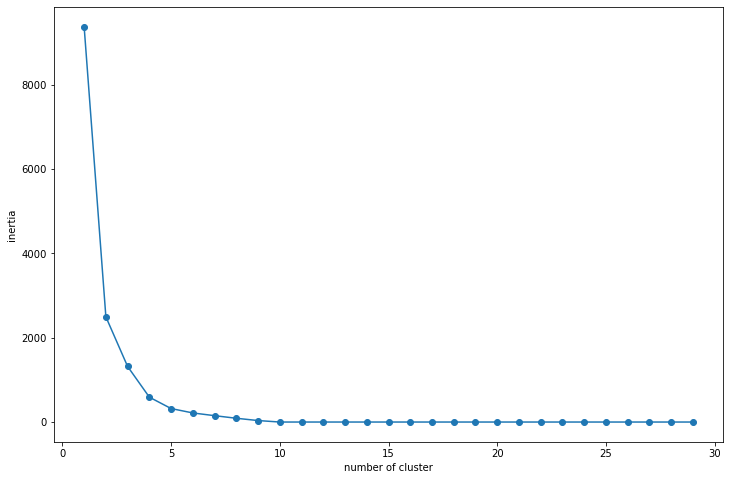

In [81]:
plt.figure(figsize=(12,8))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("number of cluster")
plt.ylabel("inertia")

In [80]:
!pip install yellowbrick

C:\Users\Sanu\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:339: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\Sanu\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:339: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\Sanu\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:339: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\Sanu\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:339: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\Sanu\anaconda3\lib\site-packages\yellow

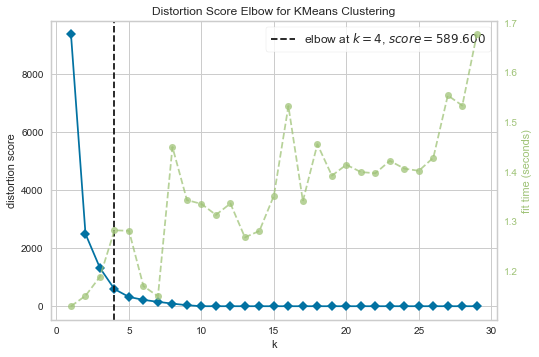

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(Newdata)
visualizer.show()

In [88]:
km=KMeans(n_clusters=4,init="k-means++",max_iter=100,random_state=101)
y_km=km.fit_predict(Newdata)
y_km

array([2, 1, 2, ..., 3, 3, 2])

In [89]:
RFM_Score["Cluster"]=km.labels_
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_Loyality,Cluster
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,2
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,1
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,2
3,12350.0,127,1,334.40,2,1,3,213,6,Gold,1
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,0
...,...,...,...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,2,1,3,213,6,Gold,1
1424,18260.0,139,3,787.77,2,4,4,244,10,Platinum,0
1425,18269.0,175,1,0.00,1,1,1,111,3,Silver,3
1426,18277.0,135,1,0.00,2,1,1,211,4,Silver,3


In [90]:
seg_map={
    r'[1][1-2][2-3]':"Inactive",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-4][1]':'Target-upsell',
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFM_Score["Segment"]=RFM_Score["RFM_ID"].replace(seg_map,regex=True)


C:\Users\Sanu\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:177: FutureWarning: Possible nested set at position 6
  re.compile(obj)


In [91]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_Loyality,Cluster,Segment
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,2,cant_lose
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,1,at-Risk
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,2,cant_lose
3,12350.0,127,1,334.40,2,1,3,213,6,Gold,1,at-Risk
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,0,promising
...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,2,1,3,213,6,Gold,1,at-Risk
1424,18260.0,139,3,787.77,2,4,4,244,10,Platinum,0,cant_lose
1425,18269.0,175,1,0.00,1,1,1,111,3,Silver,3,new customer
1426,18277.0,135,1,0.00,2,1,1,211,4,Silver,3,new customer


In [92]:
RFM_Score["Segment"].value_counts()

at-Risk           331
cant_lose         286
new customer      278
promising         205
Inactive          148
Drive_Loyality    101
Target-upsell      79
Name: Segment, dtype: int64

In [ ]:
# hirarchical clustering can also be use 